In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings;warnings.simplefilter('ignore')

In [32]:
############################################## Predict New Data ######################################################
df_newdata = pd.read_excel('INPUTS_copy.xlsx', sheet_name='Inputs')#, nrows=174)
df_newdata = df_newdata.set_index('index')
print(df_newdata.shape)
df_newdata

(174, 92)


,Flexibility,Diff_flex,Diff_rig,molecule_name,mass,epsilon,sigma,deq,polarity,ads_flex,...,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20
index,,,,,,,,,,,,,,,,,,,,,
1,0,1.040000e-04,4.500000e-04,He,4.003,0.02170,2.640,3.439,0,0,...,4.827779,3.676789,2.353982,0.694984,0.255773,0.019250,5.233628e-08,6.869468e-22,1.866049e-44,1.044823e-75
2,0,1.000000e-06,9.780000e-07,O2,32.000,0.09740,3.020,3.576,1,0,...,4.827779,3.676789,2.353982,0.694984,0.255773,0.019250,5.233628e-08,6.869468e-22,1.866049e-44,1.044823e-75
3,1,3.530000e-07,2.250000e-08,N2,28.000,0.07240,3.320,3.628,1,0,...,4.827779,3.676789,2.353982,0.694984,0.255773,0.019250,5.233628e-08,6.869468e-22,1.866049e-44,1.044823e-75
4,0,7.420000e-07,2.830000e-07,CO2,44.000,0.16000,3.033,3.718,1,0,...,4.827779,3.676789,2.353982,0.694984,0.255773,0.019250,5.233628e-08,6.869468e-22,1.866049e-44,1.044823e-75
5,1,7.480000e-08,5.500000e-04,H2O,18.000,0.15535,3.166,3.841,1,1,...,4.827779,3.676789,2.353982,0.694984,0.255773,0.019250,5.233628e-08,6.869468e-22,1.866049e-44,1.044823e-75
6,0,2.090000e-04,1.170000e-03,He,4.003,0.02170,2.640,3.439,0,0,...,22.913920,23.551454,27.631457,26.270307,27.428494,24.778403,1.833535e+01,1.415814e+01,8.481430e+00,4.820128e+00
7,1,1.270000e-06,6.420000e-05,CH4,16.030,0.29400,3.730,3.800,0,0,...,22.913920,23.551454,27.631457,26.270307,27.428494,24.778403,1.833535e+01,1.415814e+01,8.481430e+00,4.820128e+00
8,0,2.840000e-05,7.320000e-06,O2,32.000,0.09740,3.020,3.576,1,0,...,22.913920,23.551454,27.631457,26.270307,27.428494,24.778403,1.833535e+01,1.415814e+01,8.481430e+00,4.820128e+00
9,0,1.040000e-05,2.100000e-06,N2,28.000,0.07240,3.320,3.628,1,0,...,22.913920,23.551454,27.631457,26.270307,27.428494,24.778403,1.833535e+01,1.415814e+01,8.481430e+00,4.820128e+00


In [33]:
# ############################################ load data ############################################################

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

drop_cols = ['molecule_name', 'MOF_name', 'D_empty', 'D_load', 'Diff_flex', 'Diff_rig']#, 'epsilon', 'sigma', 'deq']
all_newdata = df_newdata.drop(columns=drop_cols).values
new_numeric_map = df_newdata.drop(columns=drop_cols).applymap(is_real_and_finite)
real_rows = new_numeric_map.all(axis = 1).copy().values
x_new = np.array(all_newdata[real_rows, 1:], dtype = 'float')
y_new = np.array(all_newdata[real_rows, 0], dtype = 'float')
x_names = [str(x) for x in df_newdata.drop(columns=drop_cols).columns[1:]]
y_name = df_newdata.drop(columns=drop_cols).columns[0]

print('X matrix dimensions: {}'.format(x_new.shape))
print('y matrix dimensions: {}'.format(y_new.shape))

X matrix dimensions: (174, 85)
y matrix dimensions: (174,)


In [34]:
# ############################################ data preprocessing ############################################################

################### feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(x_new)
x_new_scaled = scaler.transform(x_new)

################### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_new_scaled, y_new)
x_new_lda = lda.transform(x_new_scaled)
print(x_new_lda.shape)

(174, 1)


In [35]:
############################################## load model and predict ######################################################
import pickle

pickled_model = pickle.load(open('trained_model_RF', 'rb'))
y_new_predict = pickled_model.predict(x_new_lda)
print('recall={}'.format(recall_score(y_new, y_new_predict)))
df_newdata.Flexibility=y_new_predict

recall=1.0


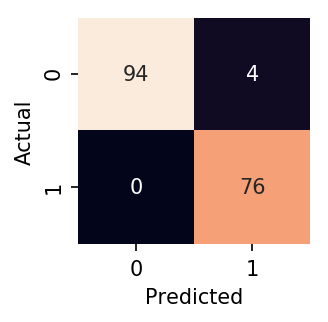

In [36]:
############################################## model evaluation ######################################################
cm = confusion_matrix(y_new, y_new_predict)
fig, ax = plt.subplots(figsize = (2,2), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False, fmt = 'd')
ax.set(xlabel='Predicted', ylabel='Actual')
plt.savefig('ConfusionMatrix.png', transparent=True, bbox_inches="tight")